# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Признаки**
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя\
  .\
**Целевой признак**\
Price — цена (евро)

В данном задании необходимо решить задачу регрессии, чтобы узнать рыночную стоимость автомобиля.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('/datasets/autos.csv')
display (df)
df.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Изучаю пропуски в датасете

#### Изучаю подробно пропуски в столбце VehicleType

In [3]:
df['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [4]:
df['VehicleType'].isna().sum()

37490

Считаю процентное содержание количества пропусков в столбце

In [5]:
print (round((100*df['VehicleType'].isna().sum())/354369), '%')

11 %


Пропусков получилось 11%, это слишком много, чтобы удалять их, и в других столбцах могут содержаться важные сведения. Я не знаю какой тип кузова у этих автомобилей, поэтому заполняю неизвестные значения 'unknown'.

In [6]:
df['VehicleType'] = df['VehicleType'].fillna('unknown')

In [7]:
df['VehicleType'].isna().sum()

0

#### Изучаю подробно пропуски в столбце Model

In [8]:
df['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

In [9]:
df['Model'].isna().sum()

19705

In [10]:
print (round((100*df['Model'].isna().sum())/354369), '%')

6 %


**Удаляю строки с пропущенным названием модели автомобиля, т.к. восстновить значения не представляется возможным**

In [11]:
df = df.dropna(subset=['Model'])

In [12]:
df['Model'].isna().sum()

0

#### Изучаю подробно пропуски в столбцах Brand, RegistrationYear, Power, Kilometer

In [13]:
df['Brand'].unique()

array(['volkswagen', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda',
       'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen',
       'honda', 'fiat', 'mini', 'smart', 'hyundai', 'audi', 'alfa_romeo',
       'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia',
       'toyota', 'chevrolet', 'dacia', 'daihatsu', 'chrysler', 'jaguar',
       'daewoo', 'porsche', 'rover', 'saab', 'land_rover', 'trabant',
       'lada'], dtype=object)

In [14]:
df['Brand'].isna().sum()

0

In [15]:
df['RegistrationYear'].isna().sum()

0

In [16]:
df['Power'].isna().sum()

0

In [17]:
df['Kilometer'].isna().sum()

0

#### Изучаю подробно пропуски в столбце Gearbox

In [18]:
df['Gearbox'].isna().sum()

15702

In [19]:
df['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [20]:
print (round((100*df['Gearbox'].isna().sum())/354369), '% пропусков в столбце Gearbox')

4 % пропусков в столбце Gearbox


Не представляю как можно было бы восстановить пропуски в столбце с коробкой передач. Коробка передач может быть как ручная, так и автоматическая в любой модели. Поэтому, вместо Nan заполняю пропуски 'unknown'

In [21]:
df['Gearbox'] = df['Gearbox'].fillna('unknown')

In [22]:
df['Gearbox'].isna().sum()

0

#### Изучаю подробно пропуски в столбце FuelType

In [23]:
df['FuelType'].isna().sum()

25732

In [24]:
print (round((100*df['FuelType'].isna().sum())/354369), '% пропусков в столбце FuelType')

7 % пропусков в столбце FuelType


In [25]:
df['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Не знаю как восстановить пропуски в столбце с типом двигателя. Поэтому, вместо Nan заполняю пропуски 'unknown'

In [26]:
df['FuelType'] = df['FuelType'].fillna('unknown')

In [27]:
df['FuelType'].isna().sum()

0

#### Изучаю подробно пропуски в столбце Repaired

In [28]:
df['Repaired'].isna().sum()

62100

Если нет сведений о ремонте автомобиля, то, вероятнее всего, ремонта не было. Поэтому, заполняю пропуски 'no'

In [29]:
df['Repaired'] = df['Repaired'].fillna('no')

In [30]:
df['Repaired'].isna().sum()

0

### Проверяю данные на наличие дубликатов

#### Поиск явных дубликатов в данных

In [31]:
print (df.duplicated().sum())

5


**Удаляю явные дубликаты**

In [32]:
df = df.drop_duplicates()

In [33]:
print (df.duplicated().sum())

0


Наличие неявных дубликатов я проверила выше, не удалось обнаружить неявные дубликаты.

### Изучаю гистограммы столбцов

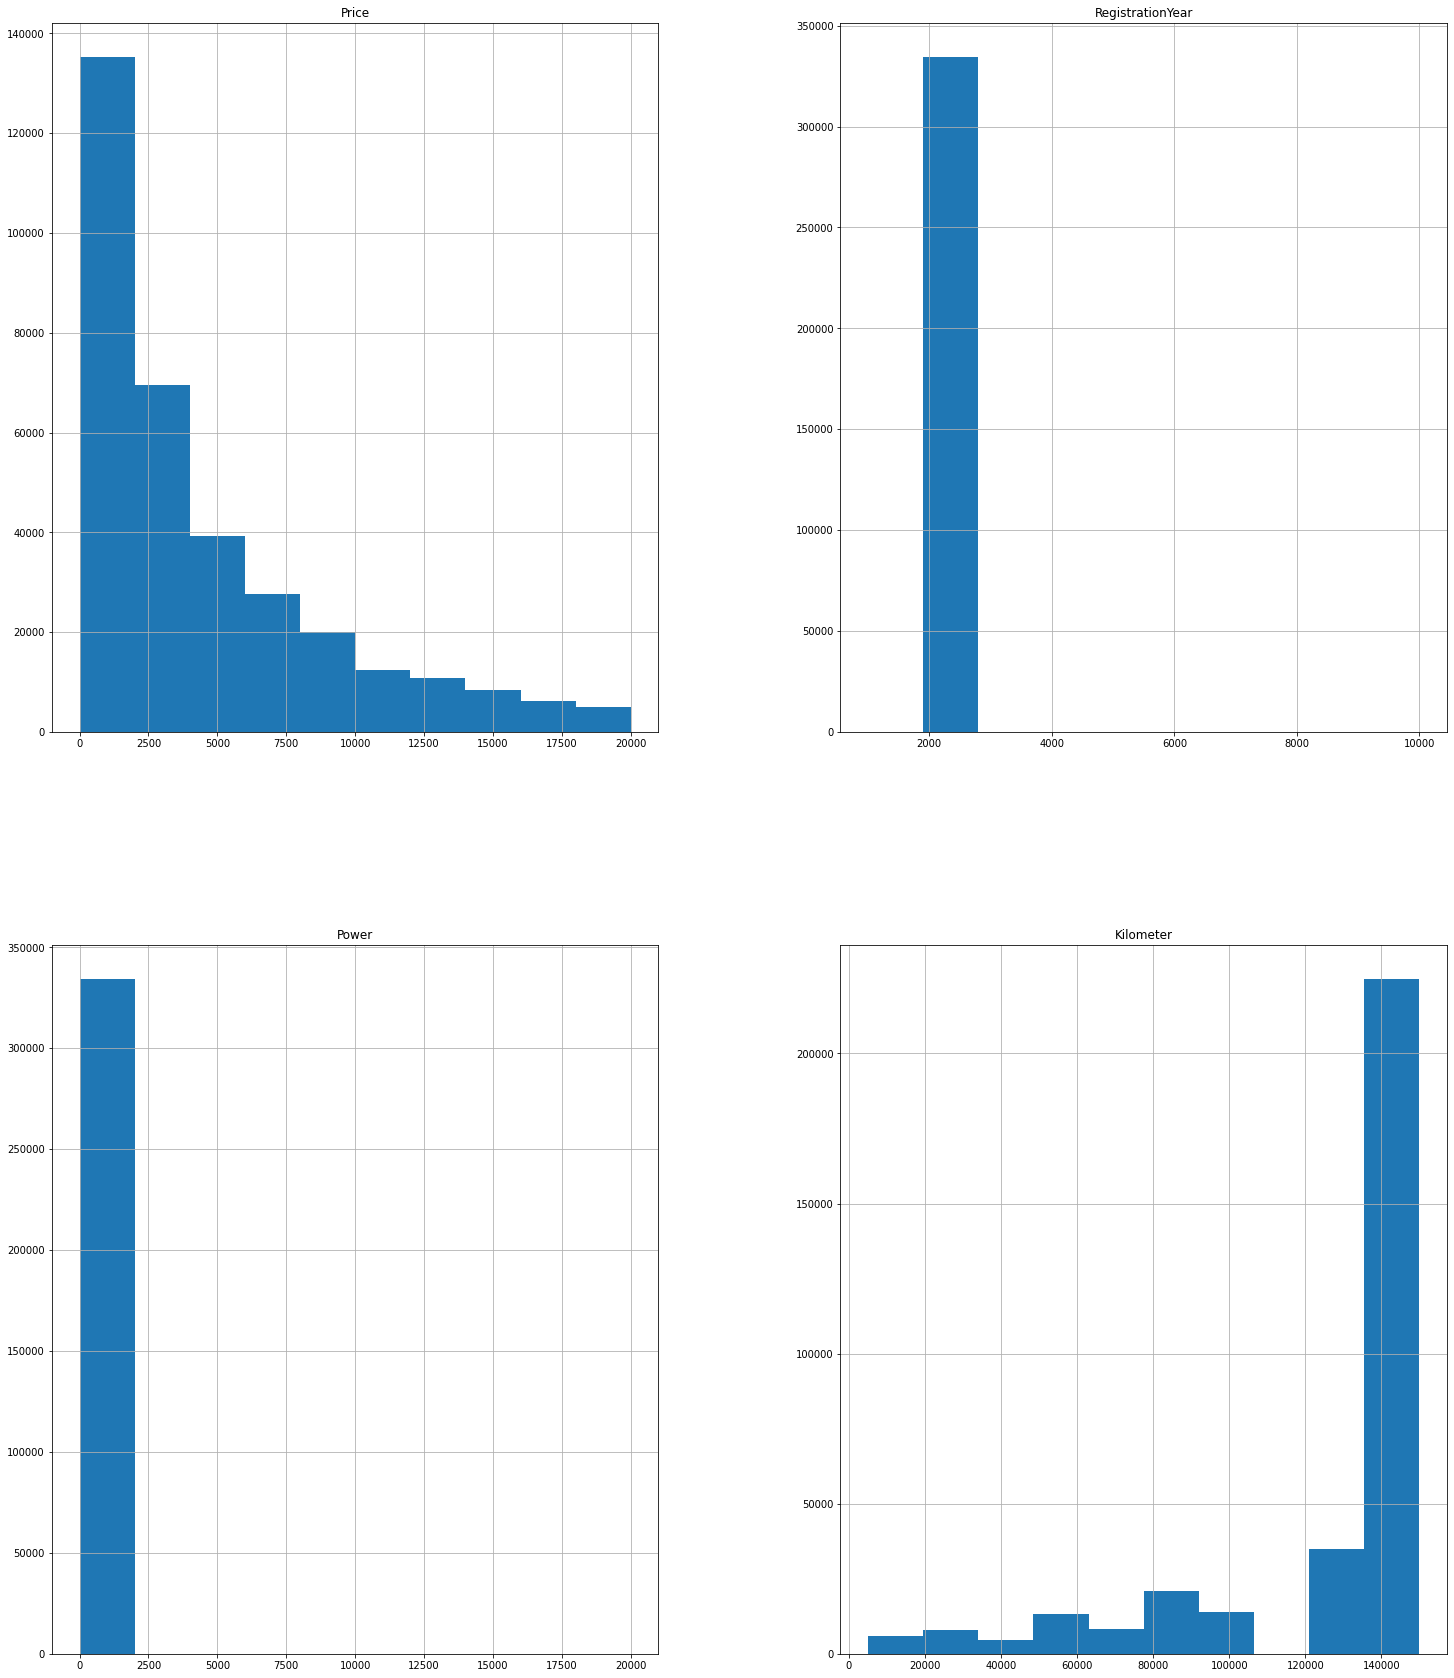

In [34]:
df.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', \
         'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1).hist(figsize=(25,30))
None

#### Изучаю подробнее столбец Price

Проверяю пропуски в столбце Цена

In [35]:
df['Price'].isna().sum()

0

In [36]:
print (round((100*df['Price'].isna().sum())/354369), '% пропусков в столбце Price')

0 % пропусков в столбце Price


Изучаю подробнее столбец Цена, меня заинтересовал выброс около нуля

In [37]:
print (df.query('Price == 0')['Price'].count())

8588


In [38]:
print (round((100*df.query('Price == 0')['Price'].count())/354369), '% нулевых значений в столбце Price')

2 % нулевых значений в столбце Price


Почему-то в столбце Цена 2% нулевых значений, это выглядит как ошибка, удаляю строки с нулевым значением в столбце Цена.

In [39]:
df = df[df.Price > 0]

#### Изучаю подробнее столбец RegistrationYear

<AxesSubplot:>

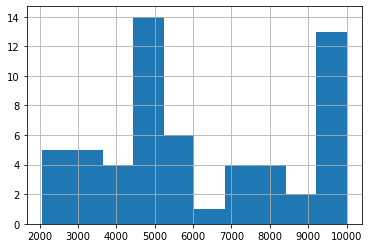

In [40]:
df.query('RegistrationYear > 2023')['RegistrationYear'].hist()

In [41]:
df['RegistrationYear'].max()

9999

In [42]:
df['RegistrationYear'].min()

1000

У нас явные ошибке в году регистрации автомобилей. Ниже считаю сколько у нас явно ошибочных значений

In [43]:
df.query('RegistrationYear > 2023')['RegistrationYear'].count()

58

In [44]:
df.query('RegistrationYear < 1970')['RegistrationYear'].count()

782

Ошибочных значений не много, поэтому удаляю строки с явно ошибочной датой регистрации автомобилей

In [45]:
df = df[df.RegistrationYear <= 2016] # год выгрузки анкеты 2016 год
print (df['RegistrationYear'].max())

2016


In [46]:
df = df[df.RegistrationYear > 1970]
print (df['RegistrationYear'].min())

1971


<AxesSubplot:>

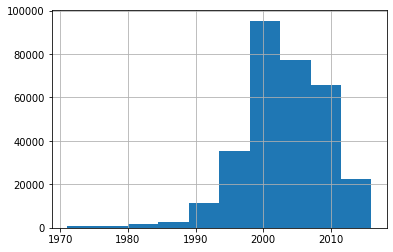

In [47]:
df['RegistrationYear'].hist()

Теперь распределение даты регистрации автомобилей выглядтит нормальным.

#### Изучаю подробнее столбец Power

<AxesSubplot:>

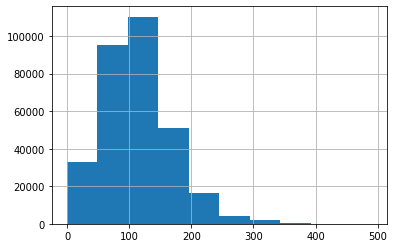

In [48]:
df.query('Power <500')['Power'].hist()

In [49]:
print (df.query('Power >500')['Power'].count())

349


Мощность автомобиля, как правило, не превышает 500 л.с., поэтому значения больше 500 л.с. - это явно ошибка, удаляю эти ошибочные значения.

In [50]:
df = df[df.Power < 500]

**После обработки еще раз проверяю данные на наличие пропусков**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312779 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        312779 non-null  object
 1   Price              312779 non-null  int64 
 2   VehicleType        312779 non-null  object
 3   RegistrationYear   312779 non-null  int64 
 4   Gearbox            312779 non-null  object
 5   Power              312779 non-null  int64 
 6   Model              312779 non-null  object
 7   Kilometer          312779 non-null  int64 
 8   RegistrationMonth  312779 non-null  int64 
 9   FuelType           312779 non-null  object
 10  Brand              312779 non-null  object
 11  Repaired           312779 non-null  object
 12  DateCreated        312779 non-null  object
 13  NumberOfPictures   312779 non-null  int64 
 14  PostalCode         312779 non-null  int64 
 15  LastSeen           312779 non-null  object
dtypes: int64(7), object(

Пропусков больше не осталось, можно приступать к обучению моделей

## Обучение моделей

### Кодирую категориальные признаки

### Разбиваю данные на выборки

In [52]:
df_train, df_valid = train_test_split(df, test_size=0.3, random_state=12345) #сначала делю данные 70-30%
df_valid, df_test = train_test_split(df_valid, test_size=0.15, random_state=12345) 

features_train = df_train.drop(['Price', 'DateCrawled', 'RegistrationMonth', 'DateCreated', 'LastSeen', 'PostalCode'], axis=1)
target_train = df_train['Price']

features_valid = df_valid.drop(['Price', 'DateCrawled', 'RegistrationMonth', 'DateCreated', 'LastSeen', 'PostalCode'], axis=1)
target_valid = df_valid['Price']

features_test = df_test.drop(['Price', 'DateCrawled', 'RegistrationMonth', 'DateCreated', 'LastSeen', 'PostalCode'], axis=1)
target_test = df_test['Price']

In [53]:
# прямое кодирование (для линейных моделей)
features_train_ohe = pd.get_dummies(features_train,  columns=['VehicleType', 'Model',\
                                       'FuelType', 'Brand', 'Repaired',\
                                       'Gearbox'], drop_first=True)
features_valid_ohe = pd.get_dummies(features_valid,  columns=['VehicleType', 'Model',\
                                       'FuelType', 'Brand', 'Repaired',\
                                       'Gearbox'], drop_first=True)
features_test_ohe = pd.get_dummies(features_test,  columns=['VehicleType', 'Model',\
                                       'FuelType', 'Brand', 'Repaired',\
                                       'Gearbox'], drop_first=True)
# после прямого кодирования кол-во признаков в выборках будет отличаться
# поэтому стоит удалить лишние признаки в каждой выборке

# Найдем общие признаки между обучающей, валидационной и тестовой выборками
common_columns = set(features_train_ohe.columns) & set(features_valid_ohe.columns) & set(features_test_ohe.columns)

# Оставим в каждой выборке только общие признаки
features_train_ohe = features_train_ohe[list(common_columns)]
features_valid_ohe = features_valid_ohe[list(common_columns)]
features_test_ohe = features_test_ohe[list(common_columns)]

### Масштабирование признаков столбцов

In [54]:
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'NumberOfPictures']

scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])
features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_valid_ohe[numeric] = scaler.transform(features_valid_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

print(features_train_ohe.shape)
display (features_train_ohe.head(5))
display (features_test_ohe.head(5))

(218945, 296)


,Model_lybra,Model_cc,Model_captiva,Brand_lada,Model_eos,Model_1er,Model_aygo,Model_x_trail,FuelType_gasoline,Model_move,...,Model_navara,FuelType_unknown,Model_galaxy,Model_5_reihe,Model_tigra,Model_clubman,Model_clio,Brand_mercedes_benz,Model_kalos,Repaired_yes
43948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154268,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
225768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Model_lybra,Model_cc,Model_captiva,Brand_lada,Model_eos,Model_1er,Model_aygo,Model_x_trail,FuelType_gasoline,Model_move,...,Model_navara,FuelType_unknown,Model_galaxy,Model_5_reihe,Model_tigra,Model_clubman,Model_clio,Brand_mercedes_benz,Model_kalos,Repaired_yes
105355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40313,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
313929,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
77766,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
55966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Запускаю модель линейной регрессии

In [55]:
%%time

model = LinearRegression()
model.fit(features_train_ohe, target_train)
predictions_train = model.predict (features_train_ohe)
predictions_valid = model.predict(features_valid_ohe)

result = mean_squared_error(target_valid, predictions_valid)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)

RMSE модели линейной регрессии на валидационной выборке: 2552.2002046448615
CPU times: user 13.3 s, sys: 4.66 s, total: 18 s
Wall time: 17.9 s


### Исследую модель случайного леса

#### Для исследования моделей, основанных на деревьях решений, использую порядковое кодирование

In [56]:
# порядковое кодирование
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
cat_columns = ['VehicleType', 'Model', 'FuelType', 'Brand', 'Repaired', 'Gearbox']
encoder.fit(features_train[cat_columns])

features_train_ord = features_train.copy()
features_valid_ord = features_valid.copy()
features_test_ord = features_test.copy()

features_train_ord[cat_columns] = encoder.transform(features_train_ord[cat_columns])
features_valid_ord[cat_columns] = encoder.transform(features_valid_ord[cat_columns])
features_test_ord[cat_columns] = encoder.transform(features_test_ord[cat_columns])

#### Масштабирую признаки столбцов

In [57]:
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'NumberOfPictures']

scaler = StandardScaler()
scaler.fit(features_train_ord[numeric])
features_train_ord[numeric] = scaler.transform(features_train_ord[numeric])
features_valid_ord[numeric] = scaler.transform(features_valid_ord[numeric])
features_test_ord[numeric] = scaler.transform(features_test_ord[numeric])

print(features_train_ord.shape)
display (features_train_ord.head(5))
display (features_test_ord.head(5))

(218945, 10)


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,NumberOfPictures
43948,2.0,-0.138424,1.0,0.610100,42.0,-0.776127,6.0,24.0,0.0,0.0
98361,2.0,-1.262154,1.0,0.070900,10.0,0.579967,6.0,19.0,0.0,0.0
153454,7.0,-0.780556,1.0,-1.791791,116.0,0.579967,6.0,37.0,0.0,0.0
154268,4.0,0.343175,1.0,-0.141512,42.0,0.579967,2.0,24.0,0.0,0.0
225768,5.0,0.985307,1.0,-0.549997,227.0,-0.776127,6.0,27.0,0.0,0.0


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,NumberOfPictures
105355,8.0,0.664241,1.0,0.103579,174.0,0.579967,4.0,23.0,0.0,0.0
40313,8.0,0.343175,1.0,0.495724,170.0,0.579967,2.0,37.0,0.0,0.0
313929,8.0,0.824774,1.0,0.544742,17.0,0.579967,2.0,19.0,0.0,0.0
77766,4.0,1.145840,1.0,0.985906,59.0,0.579967,2.0,20.0,0.0,0.0
55966,6.0,1.306373,1.0,0.201615,219.0,-2.674659,6.0,37.0,0.0,0.0


#### Исследую модель случайного леса

In [58]:
%%time

best_model = None
best_result = 0
for est in range(1, 7):
    for depth in range(1, 7):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train_ord, target_train)
        predictions_valid = model.predict(features_valid_ord)
        result = mean_squared_error(target_valid, predictions_valid)**0.5
        if result > best_result:
            best_model = model
            best_result = result

print("RMSE наилучшей модели на валидационной выборке:", best_result)
print ("Какие гиперпараметры дали наилучший результат:", best_model)

RMSE наилучшей модели на валидационной выборке: 3601.6694522232688
Какие гиперпараметры дали наилучший результат: RandomForestRegressor(max_depth=1, n_estimators=1, random_state=12345)
CPU times: user 15.3 s, sys: 2.15 ms, total: 15.3 s
Wall time: 15.3 s


RMSE наилучшей модели на валидационной выборке: 3601.6694522232688\
Какие гиперпараметры дали наилучший результат: RandomForestRegressor(max_depth=1, n_estimators=1, random_state=12345)\
CPU times: user 13.3 s, sys: 0 ns, total: 13.3 s\
Wall time: 13.3 s

### Исследую модель решающего дерева

In [59]:
%%time

model = DecisionTreeRegressor(random_state=12345)
model.fit(features_train_ord, target_train)

predictions_train = model.predict(features_train_ord)
predictions_test = model.predict(features_test_ord)

best_model = None
best_result = 0
RMSE = []
depth_tree = []
for depth in range (1, 5):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train_ord, target_train)
    predictions_valid = model.predict(features_valid_ord)
    result = mean_squared_error(target_valid, predictions_valid)**0.5
    RMSE.append(result)
    depth_tree.append(depth)
    if result > best_result:
        best_model = model
        best_result = result
        
print("RMSE наилучшей модели на валидационной выборке:", best_result)
print (best_model)

RMSE наилучшей модели на валидационной выборке: 3601.673883517605
DecisionTreeRegressor(max_depth=1, random_state=12345)
CPU times: user 1.33 s, sys: 0 ns, total: 1.33 s
Wall time: 1.34 s


RMSE наилучшей модели на валидационной выборке: 3601.673883517605\
DecisionTreeRegressor(max_depth=1, random_state=12345)\
CPU times: user 1.35 s, sys: 0 ns, total: 1.35 s\
Wall time: 1.35 s

### Исследую модель LightGBM

In [60]:
features_train_ohe.shape

(218945, 296)

In [61]:
%%time


features_train_lgb = lgb.Dataset(features_train_ohe, label=None 
                                )
features_valid_lgb = lgb.Dataset(features_valid_ohe, label=None
                                )
target_valid_lgb = lgb.Dataset(target_valid)

params = {'objective': 'regression'}

model_lgb = lgb.train(params,
                 train_set=features_train_lgb,
                 valid_sets=features_valid_lgb,
                 num_boost_round=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 218945, number of used features: 287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[1]	valid_0's l2: 0
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[2]	valid_0's l2: 0
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[3]	valid_0's l2: 0
[LightGBM] [Warning] No further splits with po

In [62]:
predictions_valid = model_lgb.predict(features_valid_ohe, pred_leaf=True)
#predictions_valid = model_lgb.predict(features_valid_lgb)
result = mean_squared_error(target_valid, predictions_valid)**0.5
print("RMSE модели на валидационной выборке:", result)

RMSE модели на валидационной выборке: 6523.899907517743


## Анализ моделей

Выше я исследовала модели линейной регрессии, дерево решений, случайный лес и LightGBM.\
Самый лучший результат показала модель линейной регрессии: RMSE=2552. Поэтому, ниже я буду тестировать модель линейной регрессии на тестовых данных.

## Тестирование лучшей модели

### Объединяю тренировочные и валидационные данные

In [63]:
features_train_valid = pd.concat([features_train_ohe, features_valid_ohe])
target_train_valid = pd.concat([target_train, target_valid])

### Тестирую модель линейной регрессии на объединенных данных

In [64]:
%%time

model = LinearRegression()
model.fit(features_train_valid, target_train_valid)
predictions_test = model.predict(features_test_ohe)

result = mean_squared_error(target_test, predictions_test)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)

RMSE модели линейной регрессии на валидационной выборке: 2546.0970967341386
CPU times: user 18 s, sys: 4.86 s, total: 22.9 s
Wall time: 22.9 s


## Вывод

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.

Заказчику важны:

качество предсказания;
скорость предсказания;
время обучения.\
\
В процессе исследования были изучены модели линейной регрессии, решающего дерева, случайного леса, LightGBM. Наилучший результат показала модель линейной регрессии.\
\
Проверка модели линейной регрессии на тестовой выборке показала ее работоспособность.\
RMSE модели линейной регрессии на валидационной выборке: 2546.0967646442464\
Время работы модели: 22.9 s